In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values
from sklearn.impute import KNNImputer

from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Model processing and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Models

from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
s0 = round(df[df['stroke'] == 0].describe(), 2)
s1 = round(df[df['stroke'] == 1].describe(), 2)

pd.concat([s0, s1], axis = 1, keys = ['No Stroke', 'Stroke'])

No Stroke                                                        \
             id      age hypertension heart_disease avg_glucose_level   
count   4861.00  4861.00      4861.00       4861.00           4861.00   
mean   36487.24    41.97         0.09          0.05            104.80   
std    21120.13    22.29         0.28          0.21             43.85   
min       67.00     0.08         0.00          0.00             55.12   
25%    17762.00    24.00         0.00          0.00             77.12   
50%    36958.00    43.00         0.00          0.00             91.47   
75%    54497.00    59.00         0.00          0.00            112.83   
max    72940.00    82.00         1.00          1.00            267.76   

                          Stroke                                     \
           bmi  stroke        id     age hypertension heart_disease   
count  4700.00  4861.0    249.00  249.00       249.00        249.00   
mean     28.82     0.0  37115.07   67.73         0.27          0.19   
std       7.91     0.0  21993.34   12.73         0.44          0.39   
min      10.30     0.0    210.00    1.32         0.00          0.00   
25%      23.40     0.0  17013.00   59.00         0.00          0.00   
50%      28.00     0.0  36706.00   71.00         0.00          0.00   
75%      33.10     0.0  56669.00   78.00         1.00          0.00   
max      97.60     0.0  72918.00   82.00         1.00          1.00   

                                        
      avg_glucose_level     bmi stroke  
count            249.00  209.00  249.0  
mean             132.54   30.47    1.0  
std               61.92    6.33    0.0  
min               56.11   16.90    1.0  
25%               79.79   26.40    1.0  
50%              105.22   29.70    1.0  
75%              196.71   33.70    1.0  
max              271.74   56.60    1.0

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
def count_negatives(data):
    neg_count = 0
    for n in data:
        if type(data) == 'int':
            if n < 0:
               neg_count += 1
    return neg_count

count_negatives(df)

0

In [9]:
df_knn = df.copy()
df_knn.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
impute = KNNImputer(n_neighbors = 5, weights = 'uniform')
df_knn['bmi'] = impute.fit_transform(df_knn[['bmi']])

In [11]:
df_knn.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Text(-0.5, -0.7, 'Color Palette For This Notebook')

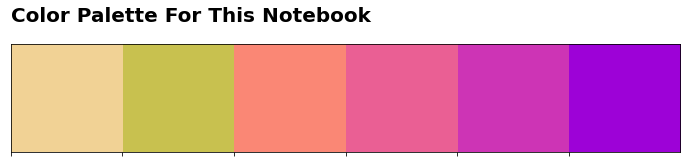

In [12]:
colors = ["#f1d295", "#c8c14f", "#fa8775", "#ea5f94", "#cd34b5", "#9d02d7"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size = 2)
plt.text(-0.5, -0.7, 'Color Palette For This Notebook', size = 20, weight = 'bold')

Text(0, 0.5, 'Count')

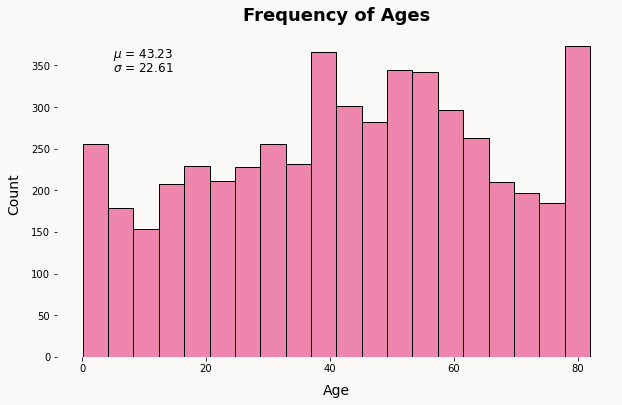

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['age'],
    kde = False,
    color = "#ea5f94"
)

for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)

plt.text(5, 360, r'$\mu$ = '+str(round(df['age'].mean(), 2)), fontsize = 12)
plt.text(5, 343, r'$\sigma$ = '+str(round(df['age'].std(), 2)), fontsize = 12)
plt.title('Frequency of Ages', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Age', fontsize = 14, labelpad = 10)
plt.ylabel('Count', fontsize = 14, labelpad = 10)

Text(0, 0.5, 'Count')

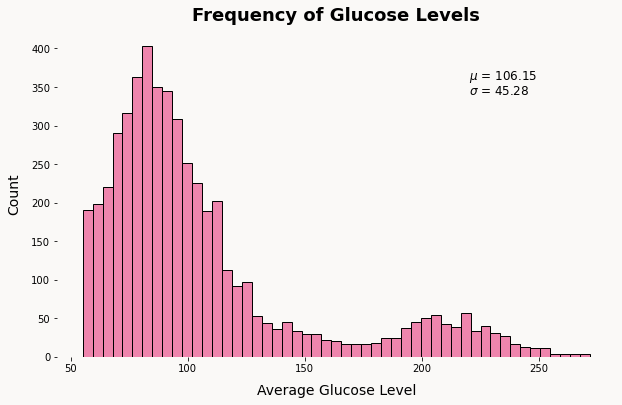

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['avg_glucose_level'],
    color = "#ea5f94",
    kde = False
)

for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)


plt.text(220, 360, r'$\mu$ = '+str(round(df['avg_glucose_level'].mean(), 2)), fontsize = 12)
plt.text(220, 340, r'$\sigma$ = '+str(round(df['avg_glucose_level'].std(), 2)), fontsize = 12)
plt.title('Frequency of Glucose Levels', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Average Glucose Level', fontsize = 14, labelpad = 10)
plt.ylabel('Count', fontsize = 14, labelpad = 10)

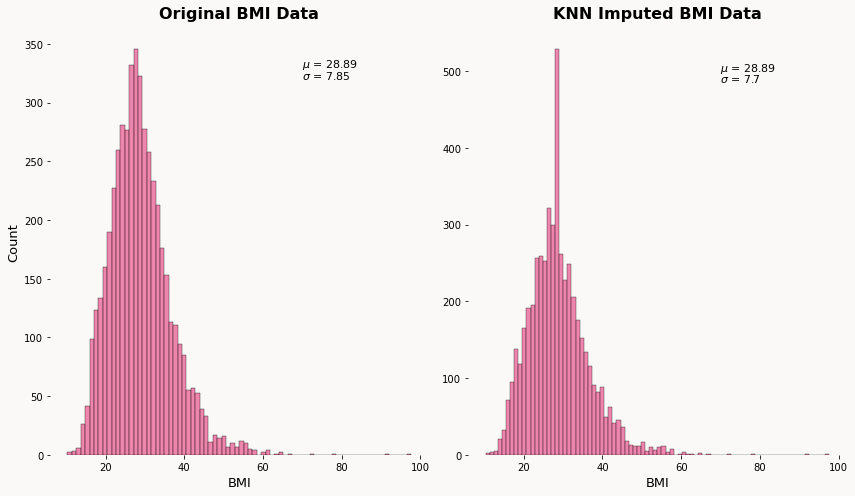

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
fig.patch.set_facecolor('#faf9f7')
ax[0].set_facecolor('#faf9f7')
ax[1].set_facecolor('#faf9f7')

sns.histplot(
    df['bmi'],
    color = "#ea5f94",
    kde = False,
    ax = ax[0]
)

sns.histplot(
    df_knn['bmi'],
    color = "#ea5f94",
    kde = False,
    ax = ax[1]
)

ax[0].text(70, 330, r'$\mu$ = '+str(round(df['bmi'].mean(), 2)), fontsize = 11)
ax[0].text(70, 320, r'$\sigma$ = '+str(round(df['bmi'].std(), 2)), fontsize = 11)
ax[0].set_title('Original BMI Data', fontsize = 16, fontweight = 'bold', pad = 10)
ax[0].set_xlabel('BMI', fontsize = 13)
ax[0].set_ylabel('Count', fontsize = 13)

ax[1].text(70, 500, r'$\mu$ = '+str(round(df_knn['bmi'].mean(), 2)), fontsize = 11)
ax[1].text(70, 485, r'$\sigma$ = '+str(round(df_knn['bmi'].std(), 2)), fontsize = 11)
ax[1].set_title('KNN Imputed BMI Data', fontsize = 16, fontweight = 'bold', pad = 10)
ax[1].set_xlabel('BMI', fontsize = 13)
ax[1].set_ylabel('')

for i in ['top', 'left', 'bottom', 'right']:
    ax[0].spines[i].set_visible(False)
    ax[1].spines[i].set_visible(False)


plt.tight_layout()

In [16]:
df['bmi'] = df_knn['bmi']
df['bmi'].isnull().sum()

0

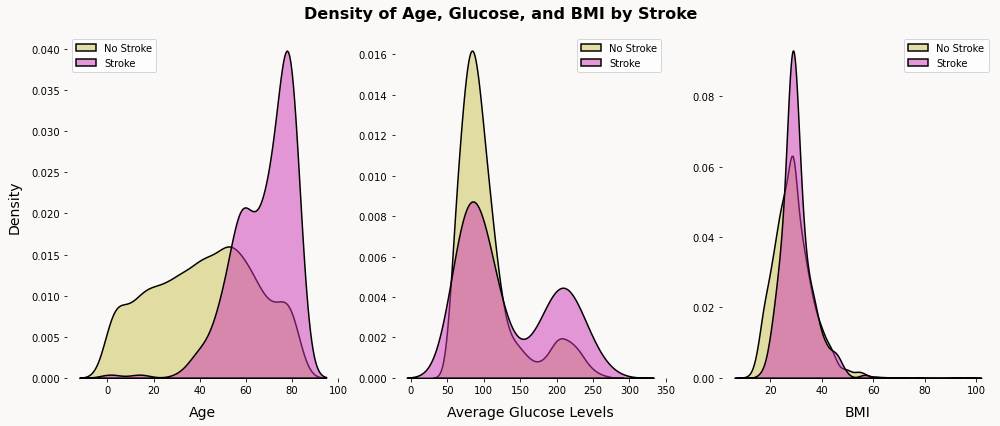

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
fig.patch.set_facecolor('#faf9f7')

for i in (ax1, ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke'] == 0],
    ax = ax1,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['age'][df['stroke'] == 1],
    ax = ax1,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age', fontsize = 14, labelpad = 10)
ax1.set_ylabel('Density', fontsize = 14, labelpad = 10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax2.legend(['No Stroke', 'Stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontsize = 16, fontweight = 'bold')

for i in (ax1, ax2, ax3):
    for j in ['top', 'left', 'bottom', 'right']:
        i.spines[j].set_visible(False)

fig.tight_layout()


In [18]:
stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]

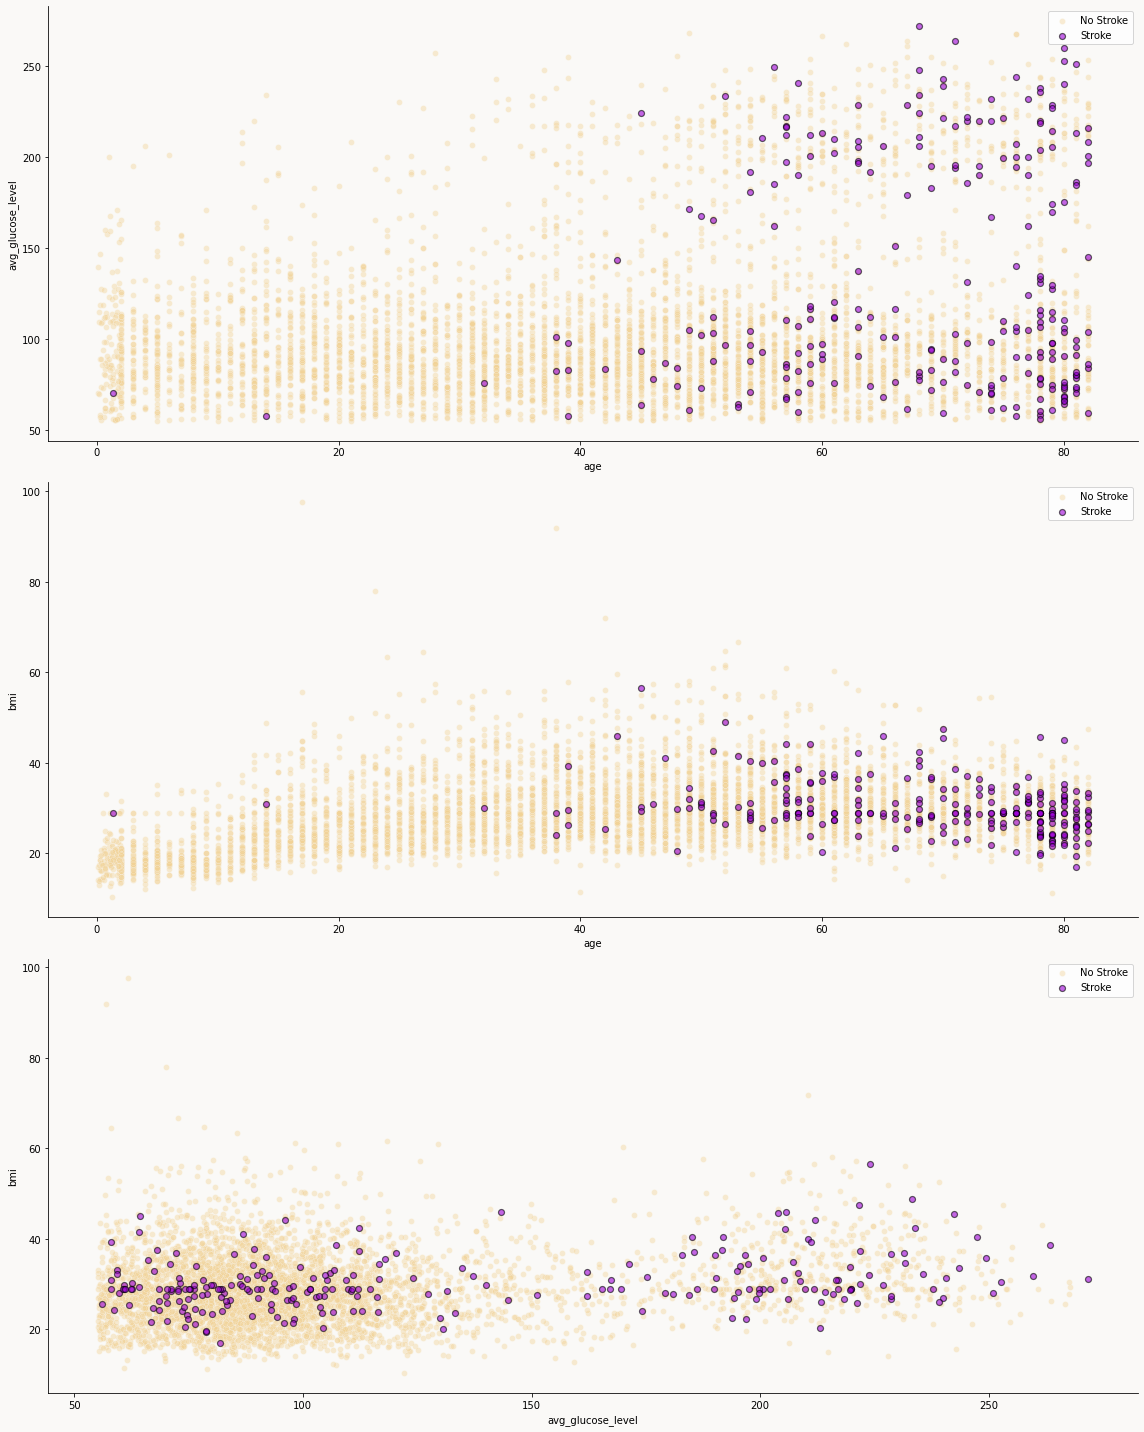

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(16,20))
fig.patch.set_facecolor('#faf9f7')
for j in range(0, 3):
    ax[j].set_facecolor('#faf9f7')

## Age vs Glucose Levels
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'avg_glucose_level', color = '#f1d295',
    alpha = 0.4, ax = ax[0]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'avg_glucose_level', color = "#9d02d7",
    ax = ax[0], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Age vs BMI
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'bmi', color = '#f1d295',
    alpha = 0.4, ax = ax[1]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'bmi', color = "#9d02d7",
    ax = ax[1], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Glucose Levels vs BMI
sns.scatterplot(
    data = no_stroke, x = 'avg_glucose_level', y = 'bmi', color = '#f1d295',
    alpha = 0.4, ax = ax[2]
)
sns.scatterplot(
    data = stroke, x = 'avg_glucose_level', y = 'bmi', color = "#9d02d7",
    ax = ax[2], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)
    
sns.despine()

for i in range(0, 3, 1):
    ax[i].legend(['No Stroke', 'Stroke'])

fig.tight_layout()

Text(0.5, 1.0, 'Percentage of Strokes')

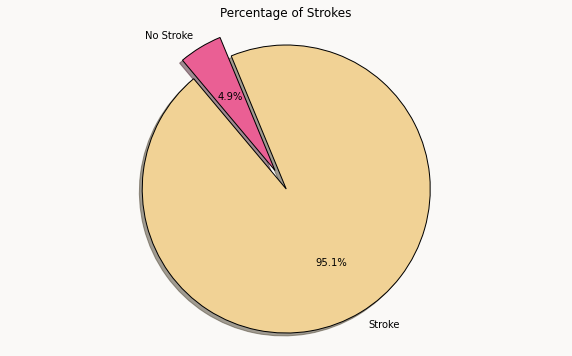

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

labels = ['Stroke', 'No Stroke']
colors = ["#f1d295", "#ea5f94"]
sizes = df['stroke'].value_counts()

plt.pie(sizes, explode = [0, 0.15], labels = labels, colors = colors,
           autopct = '%1.1f%%', shadow = True, startangle = 130,
           wedgeprops = {'ec': 'black'}, textprops = {'fontweight': 'medium'}
)
plt.axis('equal')
plt.title('Percentage of Strokes')

In [21]:
male_str = 0
fem_str = 0
male_nstr = 0
fem_nstr = 0

for index, row in df.iterrows():
    if row['gender'] == 'Male':
        if row['stroke'] == 1:
            male_str += 1
        else:
            male_nstr += 1
    else:
        if row['stroke'] == 1:
            fem_str += 1
        else:
            fem_nstr += 1

print(male_str, fem_str, male_nstr, fem_nstr)

108 141 2007 2854


Text(0.5, 50.0, 'Stroke')

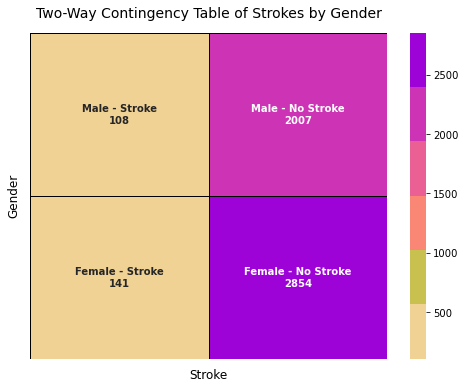

In [22]:
plt.subplots(figsize=(8,6))

stroke_matrix = np.array([[108, 2007], [141, 2854]])
labels = np.array([['Male - Stroke', 'Male - No Stroke'], ['Female - Stroke', 'Female - No Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), stroke_matrix.flatten())])).reshape(2,2)


sns.heatmap(
    stroke_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    xticklabels = False,
    yticklabels = False,
    linecolor = 'black',
    linewidth = 1,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Gender', pad = 15, fontsize = 14)
plt.ylabel('Gender', fontsize = 12, labelpad = 10)
plt.xlabel('Stroke', fontsize = 12, labelpad = 10)

In [23]:
heart_cont = pd.crosstab(df['heart_disease'], df['stroke'])
heart_cont

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


Text(0.5, 50.0, 'Stroke')

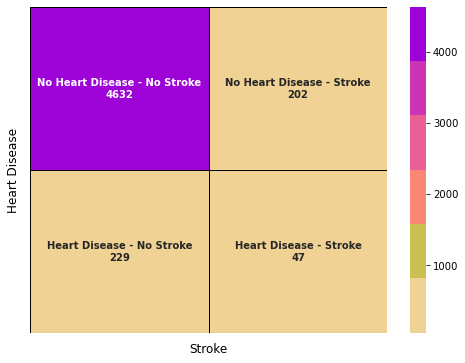

In [24]:
plt.subplots(figsize=(8,6))

heart_matrix = np.array([[4632, 202], [229, 47]])
labels = np.array([['No Heart Disease - No Stroke', 'No Heart Disease - Stroke'], ['Heart Disease - No Stroke', 'Heart Disease - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), heart_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    heart_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Heart Disease', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [25]:
stat, p, dof, expected = chi2_contingency(heart_cont)
stat, p

(90.25956125843324, 2.0887845685229236e-21)

In [26]:
hyper_cont = pd.crosstab(df['hypertension'], df['stroke'])
hyper_cont

stroke,0,1
hypertension,,
0,4429,183
1,432,66


Text(0.5, 50.0, 'Stroke')

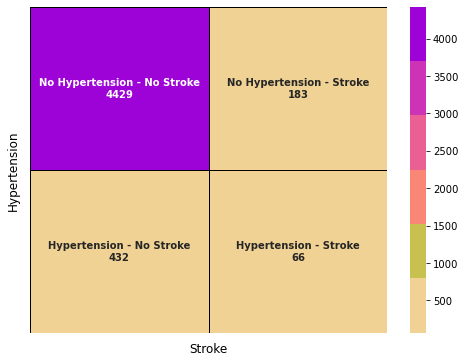

In [27]:
plt.subplots(figsize=(8,6))

hyper_matrix = np.array([[4429, 183], [432, 66]])
labels = np.array([['No Hypertension - No Stroke', 'No Hypertension - Stroke'], ['Hypertension - No Stroke', 'Hypertension - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), hyper_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    hyper_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Hypertension', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [28]:
df.groupby('Residence_type')['stroke'].value_counts()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64

In [29]:
res_cont = pd.crosstab(df['Residence_type'], df['stroke'])
res_cont

stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


Text(0.5, 50.0, 'Stroke')

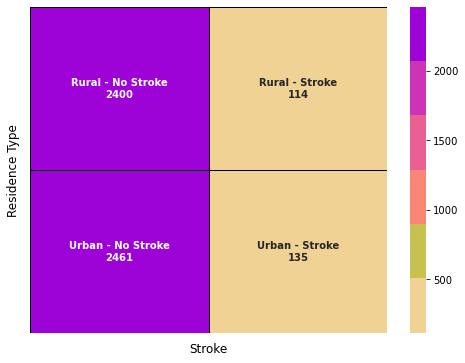

In [30]:
plt.subplots(figsize=(8,6))

res_matrix = np.array([[2400, 114], [2461, 135]])
labels = np.array([['Rural - No Stroke', 'Rural - Stroke'], ['Urban - No Stroke', 'Urban - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), res_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    res_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Residence Type', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [31]:
mar_cont = pd.crosstab(df['ever_married'], df['stroke'])
mar_cont

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


Text(0.5, 50.0, 'Stroke')

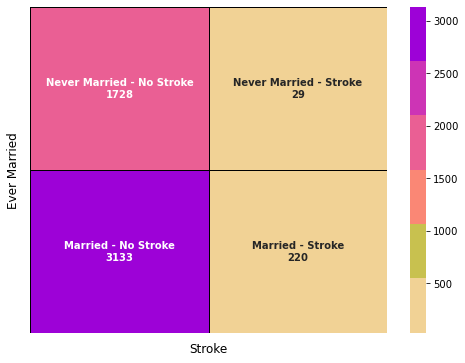

In [32]:
plt.subplots(figsize=(8,6))

mar_matrix = np.array([[1728, 29], [3133, 220]])
labels = np.array([['Never Married - No Stroke', 'Never Married - Stroke'], ['Married - No Stroke', 'Married - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), mar_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    mar_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Ever Married', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [33]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [34]:
df.groupby('smoking_status')['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

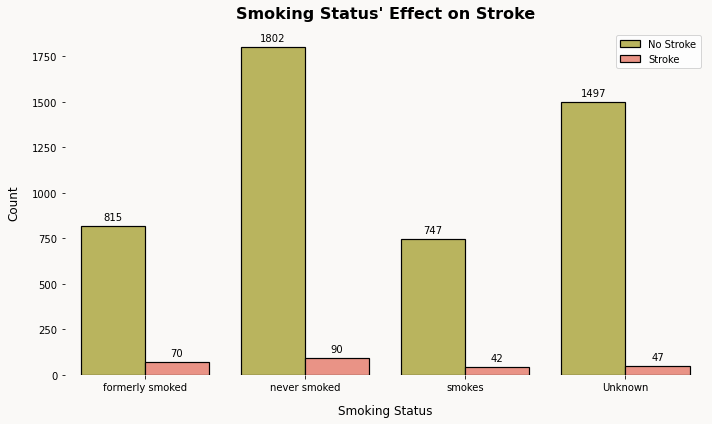

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

s = sns.countplot(
    data = df, x = 'smoking_status', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Smoking Status' Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Smoking Status', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in s.patches:
    s.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()

In [36]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

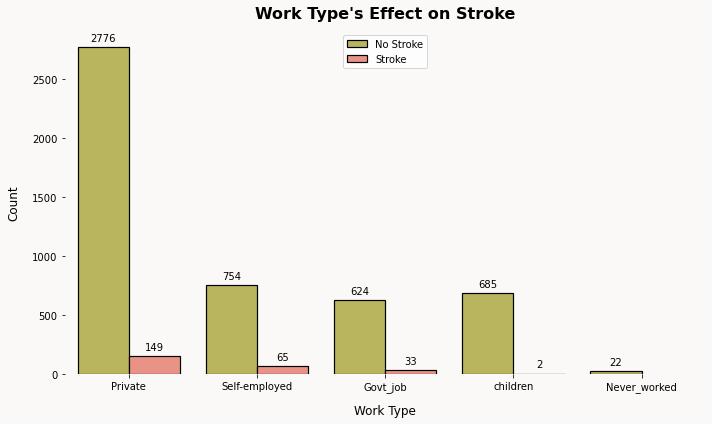

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

w = sns.countplot(
    data = df, x = 'work_type', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Work Type's Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Work Type', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in w.patches:
    w.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()

In [38]:
gen_odds = (108 * 2854) / (141 * 2007)

heart_odds = (229 * 202) / (4632 * 47)

hyper_odds = (432 * 183) / (4429 * 66)

res_odds = (2400 * 135) / (2461 * 114)

mar_odds = (1728 * 220) / (3133 * 29)

d = {
    'Features': ['Gender', 'Heart Disease', 'Hypertension',
                'Residence', 'Married'],
    'Odds': [gen_odds, heart_odds, hyper_odds, res_odds, mar_odds]
}

odds_df = pd.DataFrame(data = d)
odds_df

,Features,Odds
0,Gender,1.089209
1,Heart Disease,0.212481
2,Hypertension,0.270449
3,Residence,1.154858
4,Married,4.184158


In [39]:
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = ['sex', 'work', 'residence', 'smoke'])
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,Yes,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,Yes,202.21,28.893237,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,Yes,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,Yes,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,Yes,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [40]:
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,1,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,1,202.21,28.893237,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,1,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [41]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [42]:
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [43]:
df = df.drop('id', axis = 1)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [44]:
x = df.drop('stroke', axis = 1)
y = df['stroke']


smote = SMOTE()

x_oversample, y_oversample = smote.fit_resample(x, y)

print(y.value_counts())
print(y_oversample.value_counts())

0    4861
1     249
Name: stroke, dtype: int64
1    4861
0    4861
Name: stroke, dtype: int64


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size = 0.2, random_state = 0)

In [46]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       973
           1       0.94      0.97      0.96       972

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



In [47]:
print('Precision Score: ', round(precision_score(y_test, y_pred_rf), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_rf), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rf), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_rf), 2))

Precision Score:  0.94
Recall Score:  0.97
F1 Score:  0.96
Accuracy Score:  0.96
ROC AUC:  0.96


C:\Users\stewi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


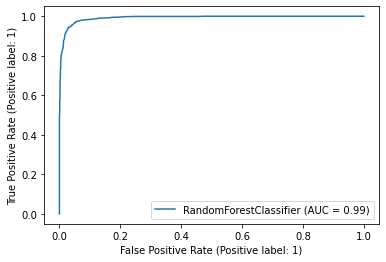

In [48]:
plot_roc_curve(rf, x_test, y_test)

<AxesSubplot:>

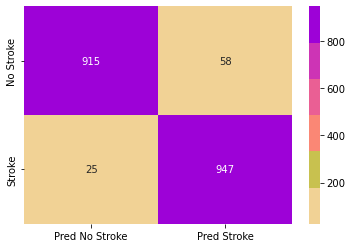

In [49]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

In [51]:
import pickle
filename=r'E:\MscIt proj\stroke\models\randomforest.sav'
pickle.dump(rf,open(filename,'wb'))

In [54]:
import os
scaler_path=os.path.join('E:\MscIt proj\stroke\models\scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)